In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
df_selection = pd.read_csv('/content/drive/MyDrive/TESIS_PYTHON/ALIMENTACION/balanced_food_selection.csv')
df_test = pd.read_csv('/content/drive/MyDrive/TESIS_PYTHON/ALIMENTACION/food_test.csv')

In [132]:
#Dividiendo los datos en x e y
x_train = df_selection.drop(['Diagnostico'], axis=1)
y_train = df_selection['Diagnostico']

In [133]:
#Dividiendo el dataset de prueba
x_test = df_test.drop(['Diagnostico'], axis=1)
y_test = df_test['Diagnostico']

**Algoritmos de Clasificación:**</br>
**Máquina de Vectores de Soporte**

In [134]:
#Entrenando con SVM
from sklearn.svm import SVC
SupportVectorMachine=SVC()
SupportVectorMachine.fit(x_train,y_train)

SVC()

In [135]:
x_test = x_test[['v_frutas','r_grasas','l_etiquetas','b_alcoholicas','agua','comer_deshoras']]

In [136]:
#Calculando las predicciones con el modelo entrenado y
#con los valores de prueba de x
import time #Módulo
start_time = time.time()
predictions_svm = SupportVectorMachine.predict(x_test)
total_time = time.time() - start_time 
print(predictions_svm)

[1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0
 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


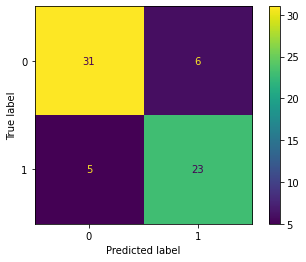

In [137]:
#Creando la matriz de confusión
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SupportVectorMachine, x_test, y_test)
plt.show()

In [138]:
#Imprimiendo las métricas de evaluación
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score 

#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("\nAccuracy:  ",accuracy_score(y_test, predictions_svm)) 
print("\nPrecision:  ",precision_score(y_test, predictions_svm))
print("\nLlevó {} segundos en total.".format(total_time))


Accuracy:   0.8307692307692308

Precision:   0.7931034482758621

Llevó 0.004419565200805664 segundos en total.


In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**K Vecinos más cercanos**

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [141]:
start_time = time.time()
predictions_knn = knn.predict(x_test)
total_time = time.time() - start_time  
print(predictions_knn)

[1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


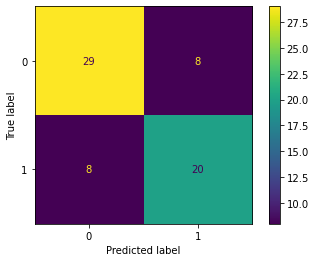

In [142]:
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

In [143]:
#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("Accuracy:  ",accuracy_score(y_test, predictions_knn)) 
print("\nPrecision:  ",precision_score(y_test, predictions_knn))
print("\nLlevó {} segundos en total.".format(total_time))

Accuracy:   0.7538461538461538

Precision:   0.7142857142857143

Llevó 0.009317874908447266 segundos en total.


**Árboles de decisiones**

In [144]:
from sklearn import tree
tr = tree.DecisionTreeClassifier(max_depth=10)
tr.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [146]:
start_time = time.time()
predictions_tr = tr.predict(x_test)
total_time = time.time() - start_time  
print(predictions_knn)

[1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


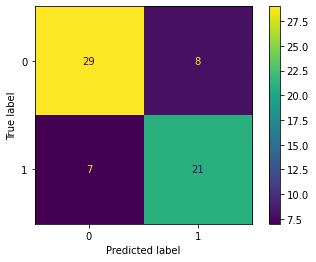

In [147]:
plot_confusion_matrix(tr, x_test, y_test)
plt.show()

In [148]:
#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("\nAccuracy:  ",accuracy_score(y_test, predictions_tr)) 
print("\nPrecision:  ",precision_score(y_test, predictions_tr))
print("\nLlevó {} segundos en total.".format(total_time))


Accuracy:   0.7692307692307693

Precision:   0.7241379310344828

Llevó 0.0044977664947509766 segundos en total.


**Perceptrón Multicapa o Multilayer Perceptron (MLP)

In [149]:
from sklearn.neural_network import MLPClassifier

In [150]:
MLP = MLPClassifier(solver='lbfgs', max_iter=500, alpha=1e-5, hidden_layer_sizes=(128, 128, 128, 128, 128),
                    random_state=1)
#se genera el modelo de entrenamiento
MLP.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128, 128, 128, 128, 128),
              max_iter=500, random_state=1, solver='lbfgs')

In [151]:
#se genera el modelo predictivo
prediccionesMLP = MLP.predict(x_test)

In [152]:
#Muestra las estadísticas entre los valores reales(y_test) y las predicciones
print("\nAccuracy:  ",accuracy_score(y_test, prediccionesMLP)) 
print("\nPrecision:  ",precision_score(y_test, prediccionesMLP))
print("\nLlevó {} segundos en total.".format(total_time))


Accuracy:   0.7692307692307693

Precision:   0.7407407407407407

Llevó 0.0044977664947509766 segundos en total.


**PCA

In [153]:
from sklearn.decomposition import PCA
# n_components = 150
#pca = PCA(.95)
#pca.fit(x_train)
# pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(x_train)
#X_train_pca = pca.transform(x_train)
#X_test_pca = pca.transform(x_test)

In [154]:
#Compare Algorithms
#prepare models
from audioop import cross
from unittest import result
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = []
models.append(('LoR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=19)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC(gamma='auto', C=2.0, kernel='linear')))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, x_test, y_test, cv = kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name} Accuracy: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LoR Accuracy: 89.83% (9.52%)
LDA Accuracy: 88.58% (12.89%)
K-NN Accuracy: 83.58% (9.82%)
CART Accuracy: 76.08% (17.18%)
NB Accuracy: 81.50% (12.32%)
SVM Accuracy: 89.83% (12.09%)


In [155]:
#Compare Algorithms
#prepare models
from audioop import cross
from unittest import result
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = []
models.append(('LoR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=19)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC(gamma='auto', C=2.0, kernel='linear')))
# evaluate each model in turn
results = []
names = []
scoring = 'precision_macro'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, x_test, y_test, cv = kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name} Precision: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LoR Precision: 90.92% (9.03%)
LDA Precision: 90.75% (10.25%)
K-NN Precision: 86.92% (8.54%)
CART Precision: 70.67% (25.63%)
NB Precision: 87.17% (9.27%)
SVM Precision: 91.50% (9.70%)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
#scoring = ['precision_macro', 'recall_macro', 'balanced_accuracy']